Now we will focus on Senator Voting data. This data provides information about senator vote $x$ and senator political affiliation $y$. We provide you with four different vectors $(a_1, a_2, a_3, a_4)$ precomputed by the EECS127 staff. Each of these vectors can be used to define a linear function $f_a: x \rightarrow a^Tx$.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
senator_df =  pd.read_csv('data_matrix.csv', index_col=0)
a_vectors = np.loadtxt('vectors.txt').reshape(4, 542)
affiliation_file = open("politician_labels.txt", "r")
affiliations = np.array([line.split('\n')[0].split(' ')[1] for line in affiliation_file.readlines()])

In [3]:
senator_df.head()

,bill_type bill_name bill_ID,missing_votes,Arlen Specter (PA),Barack H. Obama (IL),BarbaraA Mikulski(MD),BarbaraBoxer(CA),Bill Nelson(FL),BlancheL.Lincoln(AR),ByronL.Dorgan(ND),C.SaxbyChambliss(GA),...,SusanM.Collins(ME),TedStevens(AK),ThadCochran(MS),ThomasAllen'Tom'Coburn(OK),ThomasRichardCarper(DE),Thomas'Tom'Harkin(IA),TimP.Johnson(SD),TrentLott(MS),WayneA.Allard(CO),WilliamH.'Bill'Frist(TN)
2,Appropriations_Transit Security Amendment_3866,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
3,Budget_Spending_and_Taxes_2007 Budget Resoluti...,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
4,"""Budget, Spending and Taxes_Debt Limit Increas...",0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
5,"""Budget, Spending and Taxes_Education Funding ...",0.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
6,"Budget, Spending and Taxes_Reinstate Pay-As-Yo...",0.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0


Now that we have collected all the data, we will clean the senator voting data and convert it to numerical format

In [53]:
X = np.array(senator_df.values[:-1, 2:], dtype='float64')

In [54]:
# TODO: Center the data matrix X by removing to each column its mean
X_bar = X.mean(axis=1)
print(X_bar)
for i in range(X.shape[1]):
    X[:, i] = X[:, i] - X_bar
len(X[0])

[ 0.    0.02  0.04 -0.02  0.    0.3   0.02  0.02  0.16  0.    0.68 -0.42
 -0.4   0.    0.26 -0.07  0.63  0.95  0.89  0.13  0.99  0.97  0.07  0.97
  0.91 -0.07  0.01 -0.19  0.03  0.05  0.01  0.01  0.25 -0.11  0.03 -0.11
  0.01 -0.13 -0.19  0.15 -0.07 -0.07 -0.03 -0.03 -0.03  0.49 -0.07  0.03
 -0.03  0.95  0.57  0.31 -0.03  0.39 -0.03 -0.01 -0.01  0.09 -0.03 -0.73
  0.79 -0.01 -0.13  0.11  0.77 -0.03  0.98  0.98  0.58  0.96  0.2   0.06
  0.14  0.12  0.02  0.1  -0.2   0.02  0.5  -0.22 -0.06 -0.1   0.86 -0.1
 -0.12  0.7   0.14  0.64  0.6  -0.18  0.2   0.02  0.26 -0.24 -0.08  0.06
 -0.34 -0.14 -0.12  0.06  0.76  0.04 -0.02  0.1  -0.12 -0.15 -0.09 -0.13
  0.91 -0.01  0.31  0.35 -0.05 -0.09 -0.09  0.03  0.21  0.11 -0.05  0.71
  0.15  0.97  0.13  0.09  0.01  0.29  0.19 -0.01  0.91  0.49 -0.09  0.07
  0.01 -0.09  0.96  0.94  0.74  0.46  0.5  -0.04 -0.1   0.95 -0.09 -0.07
  0.25  0.95  0.07  0.35 -0.09  0.88  0.92 -0.04  0.94  0.26  0.3   0.86
  0.93  0.93  0.03  0.63  0.91  0.29  0.07  0.17  0.

100

In [51]:
# TODO: compute for each vector a the score of each senator
senator_scores = np.zeros(shape=(4, 100))
print(len(senator_scores), len(senator_scores[0]))
for i in range(4):
    senator_scores[i] = a_vectors[i].dot(X)

4 100


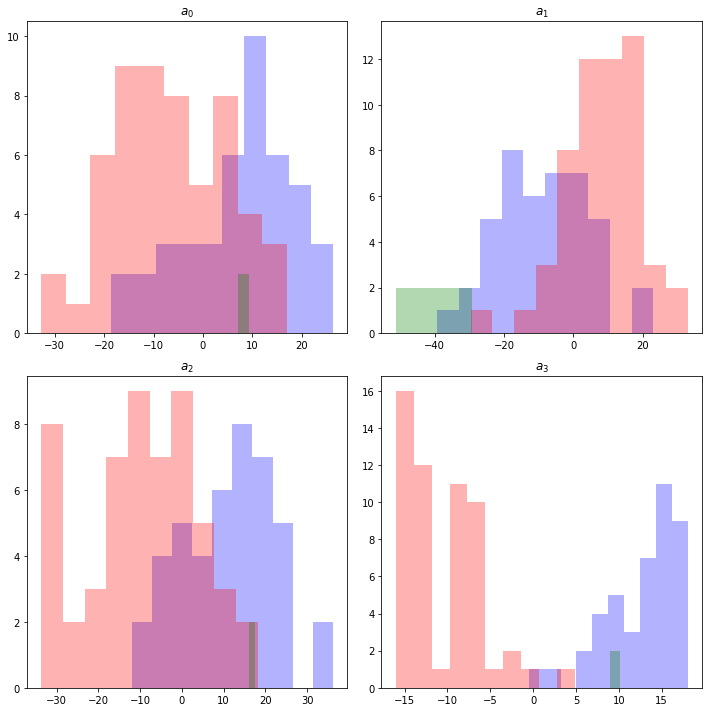

In [52]:
# Then we help you visualizing the scores with the library matplotlib
f, axarr = plt.subplots(2, 2,figsize=(10, 10))
for i in range(4):
    axarr[i // 2,  i % 2].hist(senator_scores[i, affiliations == "Blue"], color="Blue", alpha=0.3)
    axarr[i // 2,  i % 2].hist(senator_scores[i, affiliations == "Red"], color="Red", alpha=0.3)
    axarr[i // 2,  i % 2].hist(senator_scores[i, affiliations == "Yellow"], color="Green", bins=1, alpha=0.3)
    axarr[i // 2,  i % 2].set_title(r'$a_'+ str(i)  +'$')
plt.tight_layout()
plt.show()